# Housing Market Data Analysis in R Project

### Data analysis

In [67]:
# Load the libraries
library(dplyr)
library(magrittr)  # This loads the pipe operator (%>%)
library(ggplot2)
library(car)
library(reshape2)
library(rlang)
library(corrplot)
library(ggcorrplot)
library(tidyr)
library(lmtest)

### Load and inspect the Dataset

In [2]:
# Load the dataset
file_path <- "/Users/skye/Documents/project/housing_data.csv"
data_original <- read.csv(file_path)

# Create a copy of the dataset
data <- data_original  

# Inspect the data structure
str(data)          # Shows the structure of the data
summary(data)      # Provides a summary of each column
head(data)         # Displays the first few rows of the dataset
tail(data)         # Displays the last few rows of the dataset

'data.frame':	506 obs. of  5 variables:
 $ Crime.Rate             : num  NA 2.65 4.62 6.81 2.41 ...
 $ Average.Rooms          : num  5.59 5.4 6.03 5.42 6.19 ...
 $ Public.Transport.Access: int  10 3 9 10 2 6 7 9 3 10 ...
 $ Number.of.Schools      : int  3 6 4 5 4 4 4 4 6 4 ...
 $ Median.Home.Value      : num  47.9 41.5 48.5 42.5 51.4 ...


   Crime.Rate        Average.Rooms   Public.Transport.Access Number.of.Schools
 Min.   : 0.005305   Min.   :4.112   Min.   : 1.000          Min.   : 0.000   
 1st Qu.: 1.299938   1st Qu.:5.598   1st Qu.: 3.000          1st Qu.: 4.000   
 Median : 3.031481   Median :6.033   Median : 5.000          Median : 5.000   
 Mean   : 3.137415   Mean   :6.026   Mean   : 5.421          Mean   : 4.992   
 3rd Qu.: 4.584798   3rd Qu.:6.460   3rd Qu.: 8.000          3rd Qu.: 6.000   
 Max.   :12.631829   Max.   :7.801   Max.   :10.000          Max.   :10.000   
 NA's   :25          NA's   :15                                               
 Median.Home.Value
 Min.   :31.55    
 1st Qu.:43.23    
 Median :46.91    
 Mean   :47.10    
 3rd Qu.:50.85    
 Max.   :62.56    
                  

,Crime.Rate,Average.Rooms,Public.Transport.Access,Number.of.Schools,Median.Home.Value
,<dbl>,<dbl>,<int>,<int>,<dbl>
1,NA,5.585324,10,3,47.90077
2,2.654339,5.395206,3,6,41.53910
3,4.619221,6.033965,9,4,48.51757
4,6.807575,5.418335,10,5,42.50757
5,2.414617,6.189320,2,4,51.39125
6,2.414658,5.964833,6,4,49.64657


,Crime.Rate,Average.Rooms,Public.Transport.Access,Number.of.Schools,Median.Home.Value
,<dbl>,<dbl>,<int>,<int>,<dbl>
501,5.315444,6.626635,9,4,51.99554
502,NA,6.444620,4,6,53.57924
503,0.100000,6.734687,4,3,49.65183
504,4.407423,5.625335,2,1,43.67766
505,1.373394,6.922176,6,3,50.66238
506,1.782187,6.138320,2,4,45.43800


#### Data Cleaning

[1] "Missing values per column:"
   Crime.Rate Average.Rooms 
           25            15 


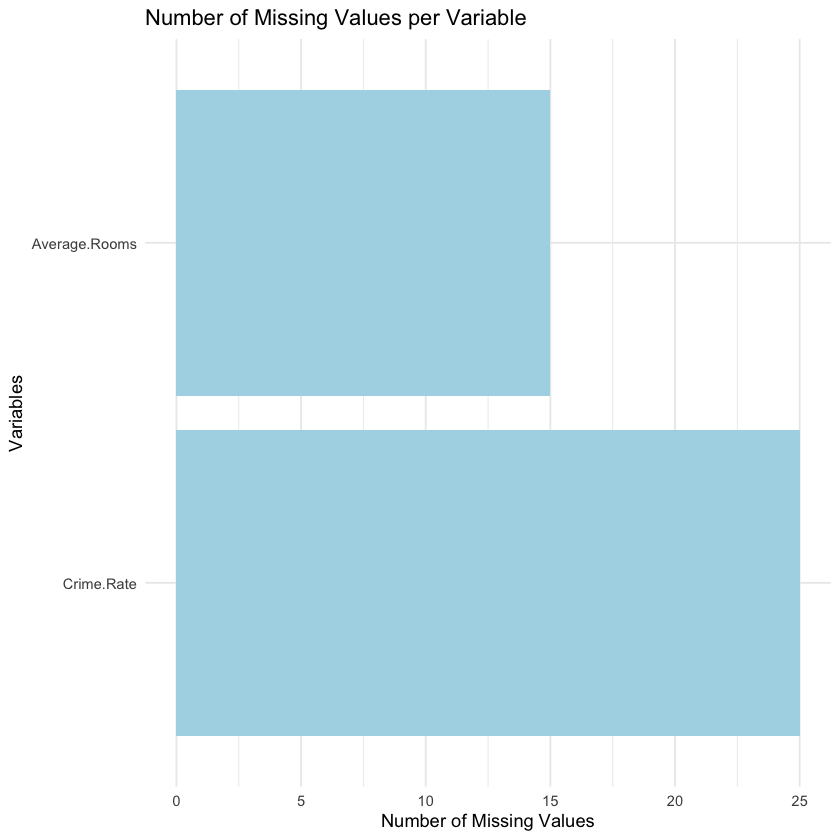

In [3]:
# Check for missing values in each column
missing_values <- colSums(is.na(data))

# Display the missing values
print("Missing values per column:")
missing_values_nonzero <- missing_values[missing_values > 0]
print(missing_values_nonzero)

# Create a data frame for the missing values
missing_df <- data.frame(
  Variable = names(missing_values_nonzero),
  Missing_Count = missing_values_nonzero
)

# Bar plot for missing values
ggplot(missing_df, aes(x = reorder(Variable, -Missing_Count), y = Missing_Count)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  coord_flip() +  # Horizontal orientation
  theme_minimal() +
  labs(title = "Number of Missing Values per Variable",
       x = "Variables",
       y = "Number of Missing Values")

In [4]:
# Replace missing values with the median
data_cleaned <- data %>%
  mutate(across(everything(), ~ ifelse(is.na(.), median(., na.rm = TRUE), .)))
missing_values_after <- colSums(is.na(data_cleaned))

In [5]:
# Check missing values before and after cleaning
cat("Missing values before cleaning:\n")
print(colSums(is.na(data)))

cat("Missing values after cleaning:\n")
print(colSums(is.na(data_cleaned)))

Missing values before cleaning:
             Crime.Rate           Average.Rooms Public.Transport.Access 
                     25                      15                       0 
      Number.of.Schools       Median.Home.Value 
                      0                       0 
Missing values after cleaning:
             Crime.Rate           Average.Rooms Public.Transport.Access 
                      0                       0                       0 
      Number.of.Schools       Median.Home.Value 
                      0                       0 


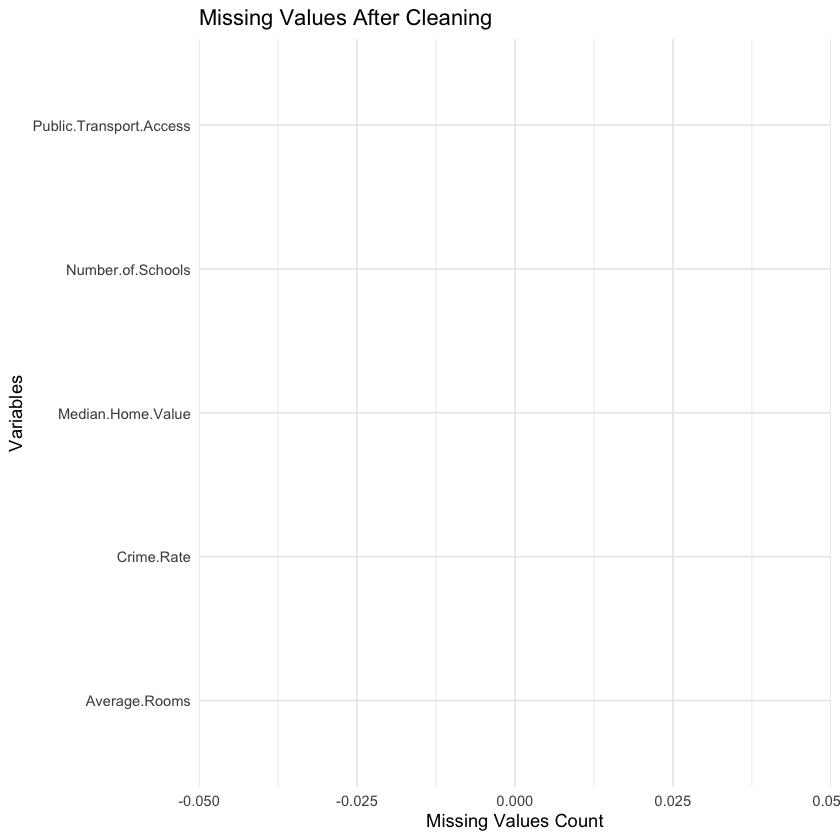

In [6]:
missing_values_after <- colSums(is.na(data_cleaned))
# Create data frames for missing values before and after cleaning
missing_after_df <- data.frame(
  Variable = names(missing_values_after),
  Missing_Count = missing_values_after
)

# Plot after cleaning
plot_after <- ggplot(missing_after_df, aes(x = reorder(Variable, -Missing_Count), y = Missing_Count)) +
  geom_bar(stat = "identity", fill = "gray") +
  coord_flip() +
  theme_minimal() +
  labs(title = "Missing Values After Cleaning", x = "Variables", y = "Missing Values Count")

# Display plot
print(plot_after)

In [7]:
# Print column names to verify
colnames(data_cleaned)

[1] "Crime.Rate"              "Average.Rooms"          
[3] "Public.Transport.Access" "Number.of.Schools"      
[5] "Median.Home.Value"

In [8]:
# Show the first 10 rows of the data
head(data, 10)

,Crime.Rate,Average.Rooms,Public.Transport.Access,Number.of.Schools,Median.Home.Value
,<dbl>,<dbl>,<int>,<int>,<dbl>
1,NA,5.585324,10,3,47.90077
2,2.654339,5.395206,3,6,41.53910
3,4.619221,6.033965,9,4,48.51757
4,6.807575,5.418335,10,5,42.50757
5,2.414617,6.189320,2,4,51.39125
6,2.414658,5.964833,6,4,49.64657
7,6.948032,5.832736,7,4,48.76959
8,4.918587,5.364705,9,4,38.21798
9,1.826314,5.596260,3,6,44.69063


In [9]:
# Check the first 10 rows of the cleaned data
head(data_cleaned, 10)

,Crime.Rate,Average.Rooms,Public.Transport.Access,Number.of.Schools,Median.Home.Value
,<dbl>,<dbl>,<int>,<int>,<dbl>
1,3.031481,5.585324,10,3,47.90077
2,2.654339,5.395206,3,6,41.53910
3,4.619221,6.033965,9,4,48.51757
4,6.807575,5.418335,10,5,42.50757
5,2.414617,6.189320,2,4,51.39125
6,2.414658,5.964833,6,4,49.64657
7,6.948032,5.832736,7,4,48.76959
8,4.918587,5.364705,9,4,38.21798
9,1.826314,5.596260,3,6,44.69063


In [10]:
# Descriptive statistics
summary(data_cleaned)

   Crime.Rate        Average.Rooms   Public.Transport.Access Number.of.Schools
 Min.   : 0.005305   Min.   :4.112   Min.   : 1.000          Min.   : 0.000   
 1st Qu.: 1.375937   1st Qu.:5.605   1st Qu.: 3.000          1st Qu.: 4.000   
 Median : 3.031481   Median :6.033   Median : 5.000          Median : 5.000   
 Mean   : 3.132181   Mean   :6.026   Mean   : 5.421          Mean   : 4.992   
 3rd Qu.: 4.533860   3rd Qu.:6.451   3rd Qu.: 8.000          3rd Qu.: 6.000   
 Max.   :12.631829   Max.   :7.801   Max.   :10.000          Max.   :10.000   
 Median.Home.Value
 Min.   :31.55    
 1st Qu.:43.23    
 Median :46.91    
 Mean   :47.10    
 3rd Qu.:50.85    
 Max.   :62.56    

In [11]:
# Check the number of missing values (NA) in each column for the cleaned data
colSums(is.na(data_cleaned))

Crime.Rate           Average.Rooms Public.Transport.Access 
                      0                       0                       0 
      Number.of.Schools       Median.Home.Value 
                      0                       0

#### Descriptive statistics

In [12]:
# Calculate mean, median, mode, and standard deviation (SD)
mean_values <- sapply(data_cleaned, function(x) if (is.numeric(x)) mean(x, na.rm = TRUE))
median_values <- sapply(data_cleaned, function(x) if (is.numeric(x)) median(x, na.rm = TRUE))

# Custom function to calculate mode
calculate_mode <- function(x) {
  x <- x[!is.na(x)]  # Exclude NA values
  if (length(x) == 0) return(NA)  # Return NA if all values are NA
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]  # Return the mode
}

mode_values <- sapply(data_cleaned, function(x) if (is.numeric(x)) calculate_mode(x))

# Calculate standard deviation (SD)
sd_values <- sapply(data_cleaned, function(x) if (is.numeric(x)) sd(x, na.rm = TRUE))

# Display descriptive statistics
print(data.frame(Mean = mean_values, Median = median_values, Mode = mode_values, SD = sd_values))

                             Mean    Median      Mode        SD
Crime.Rate               3.132181  3.031481  0.100000 2.1699053
Average.Rooms            6.025958  6.033179  6.033179 0.6651978
Public.Transport.Access  5.420949  5.000000  2.000000 2.8588366
Number.of.Schools        4.992095  5.000000  5.000000 1.9780821
Median.Home.Value       47.103558 46.912574 47.900766 5.4893623


#### Histogram for Crime Rate

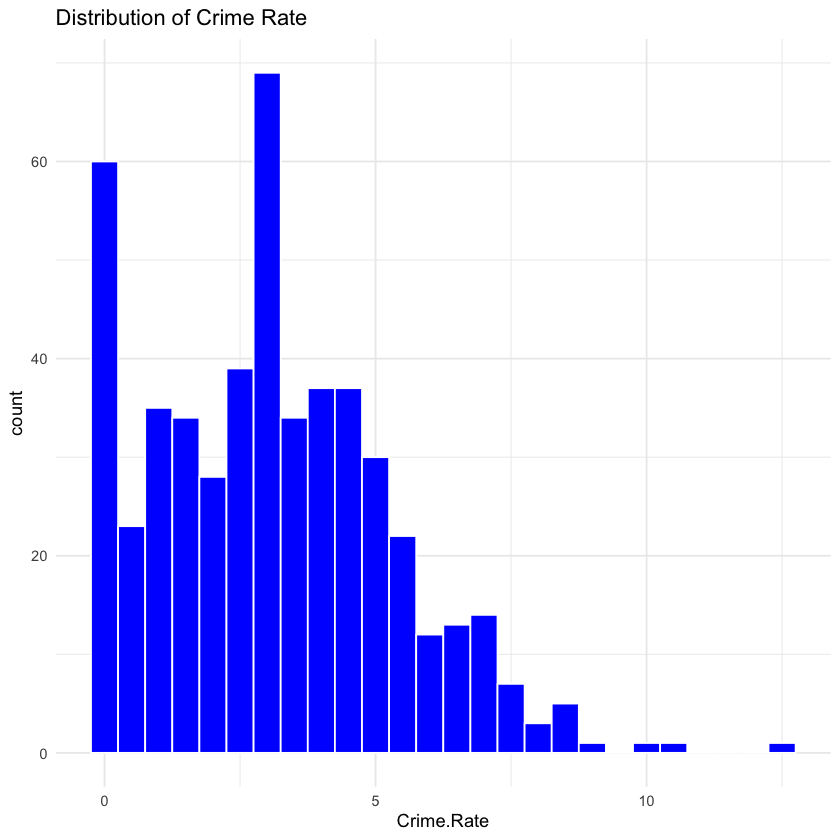

In [13]:
ggplot(data_cleaned, aes(x = Crime.Rate)) +
  geom_histogram(binwidth = 0.5, fill = "blue", color = "white") +
  ggtitle("Distribution of Crime Rate")+
  theme_minimal() 

#### Scatterplot: Average.Rooms vs Median.Home.Value

`geom_smooth()` using formula = 'y ~ x'


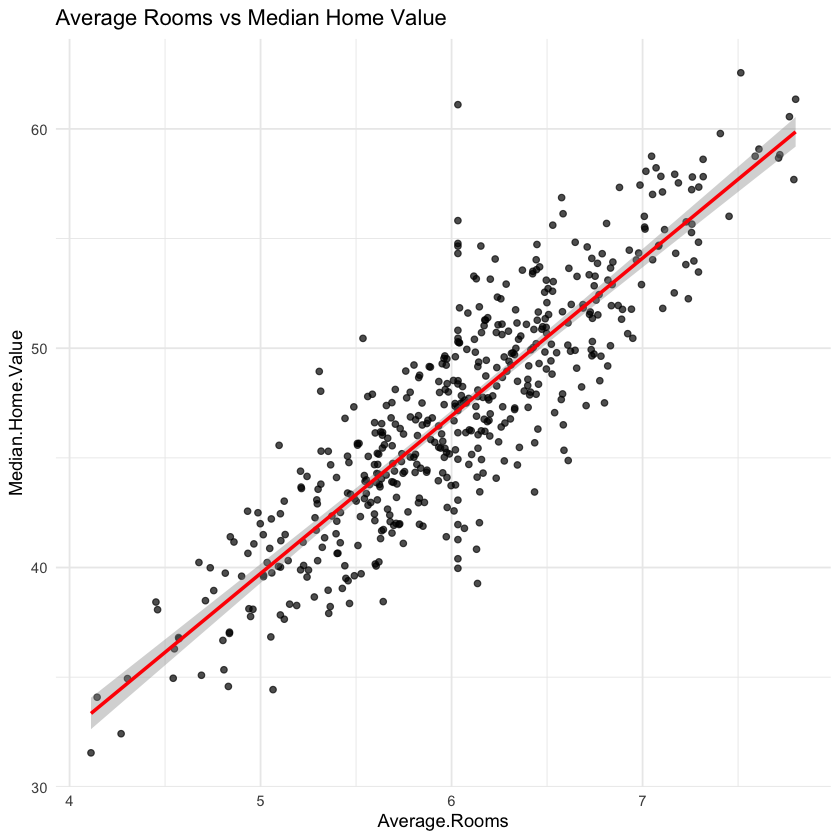

In [14]:
ggplot(data_cleaned, aes(x = Average.Rooms, y = Median.Home.Value)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", col = "red") +
  ggtitle("Average Rooms vs Median Home Value") +
  theme_minimal() 

#### Calculate Correlation Matrix and find The pair with the highest correlation

In [15]:
# Calculate correlation matrix with cleaned data
cor_matrix <- cor(data_cleaned %>% select(where(is.numeric)), use = "complete.obs")
cor_matrix

,Crime.Rate,Average.Rooms,Public.Transport.Access,Number.of.Schools,Median.Home.Value
Crime.Rate,1.00000000,0.104025929,0.0106486946,0.024904454,0.0857694398
Average.Rooms,0.10402593,1.000000000,-0.0073548555,-0.008008659,0.8711098823
Public.Transport.Access,0.01064869,-0.007354855,1.0000000000,0.014596282,0.0009097478
Number.of.Schools,0.02490445,-0.008008659,0.0145962817,1.000000000,-0.0072444918
Median.Home.Value,0.08576944,0.871109882,0.0009097478,-0.007244492,1.0000000000


In [16]:
significant_correlations <- cor_matrix[abs(cor_matrix) > 0.5]
print(significant_correlations)

[1] 1.0000000 1.0000000 0.8711099 1.0000000 1.0000000 0.8711099 1.0000000


In [17]:
# Find the highest correlation (excluding perfect self-correlations)
max_corr <- max(cor_matrix[upper.tri(cor_matrix)], na.rm = TRUE)

# Extract indices of the maximum correlation
max_corr_indices <- which(cor_matrix == max_corr, arr.ind = TRUE)

# Retrieve the variable names of the highest correlated pair
highest_corr_pair <- colnames(cor_matrix)[max_corr_indices]

# Display the results
cat("The highest correlation is between:", highest_corr_pair[1], "and", highest_corr_pair[2], "\n")
cat("Correlation value:", max_corr, "\n")

The highest correlation is between: Median.Home.Value and Average.Rooms 
Correlation value: 0.8711099 


#### Correlation Matrix and Scatter Plot for the Most Correlated Variables

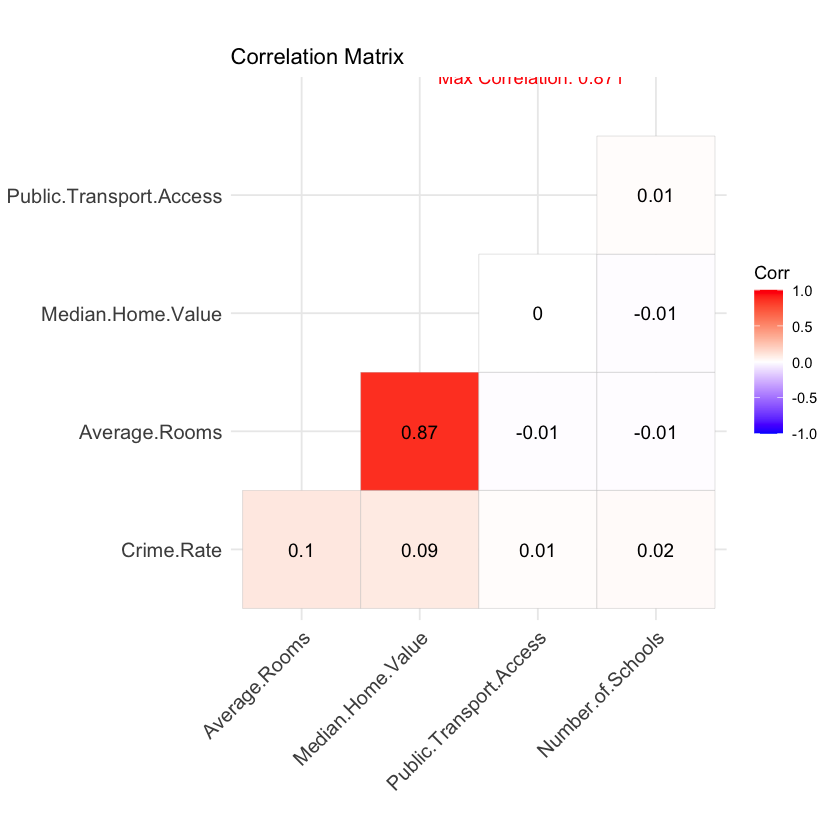

In [18]:
# Plot the correlation matrix
ggcorrplot(cor_matrix, 
           hc.order = TRUE, 
           type = "lower", 
           lab = TRUE, 
           title = "Correlation Matrix") +
  # Annotate the highest correlation
  annotate("text", 
           x = max_corr_indices[2], 
           y = max_corr_indices[1], 
           label = paste("Max Correlation:", round(max_corr, 3)), 
           color = "red", 
           hjust = -0.1)

`geom_smooth()` using formula = 'y ~ x'


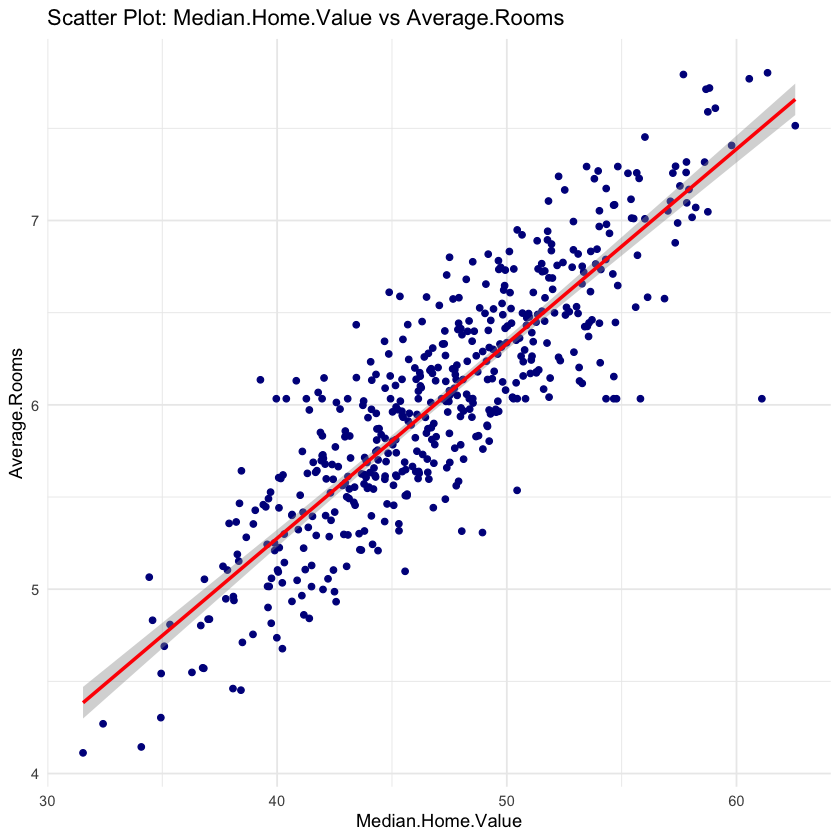

In [19]:
# Scatter Plot for the variables with the highest correlation
ggplot(data_cleaned, aes(x = !!sym(highest_corr_pair[1]), y = !!sym(highest_corr_pair[2]))) + 
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", color = "red") +
  ggtitle(paste("Scatter Plot:", highest_corr_pair[1], "vs", highest_corr_pair[2])) +
  xlab(highest_corr_pair[1]) +
  ylab(highest_corr_pair[2]) +
  theme_minimal()

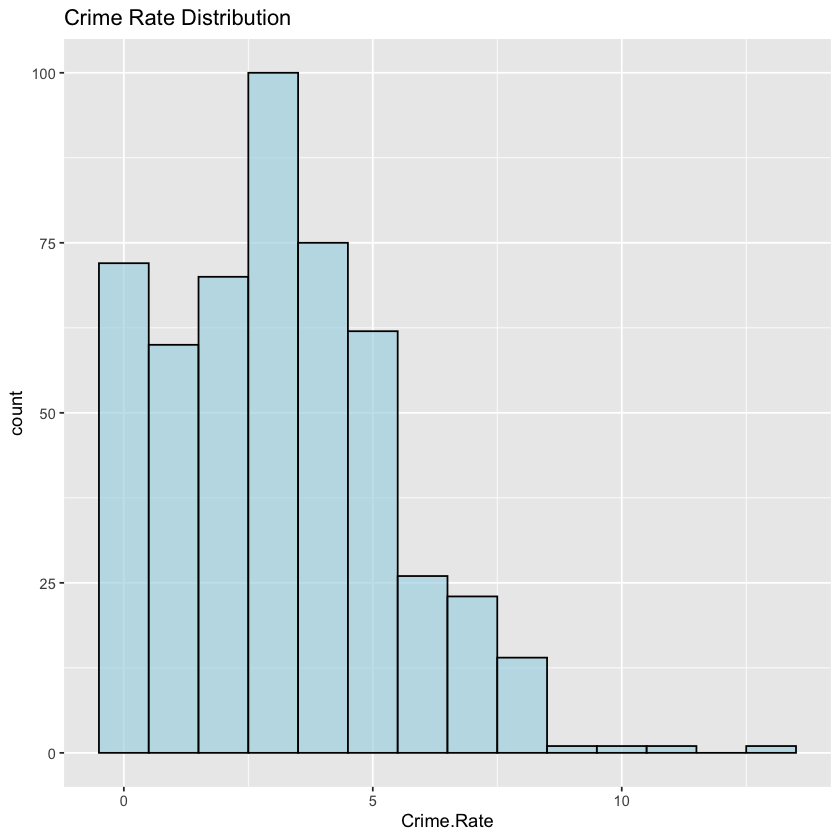

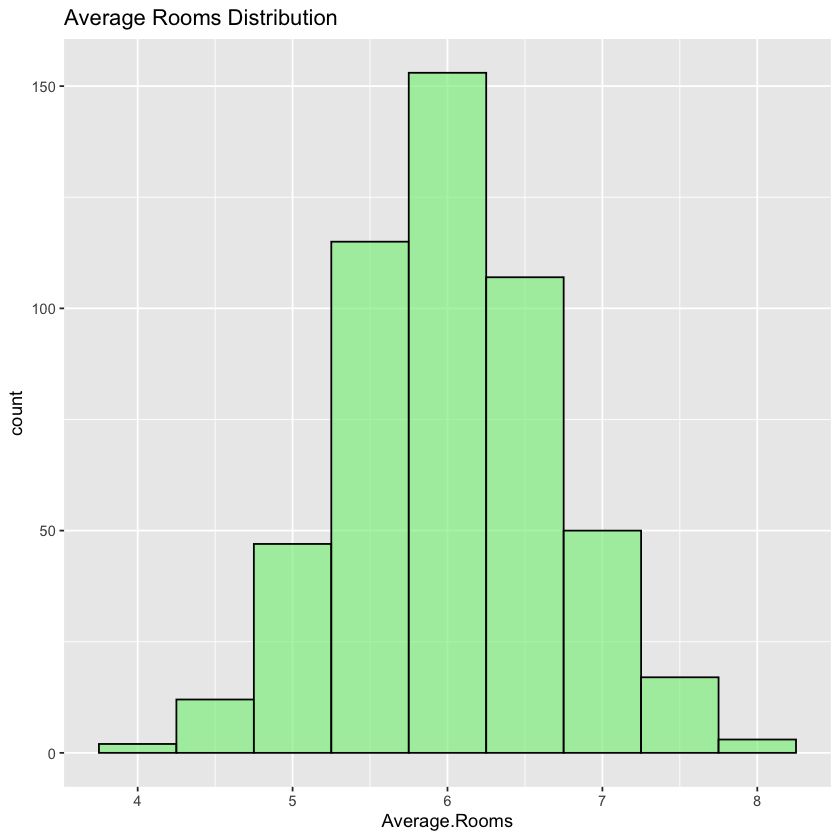

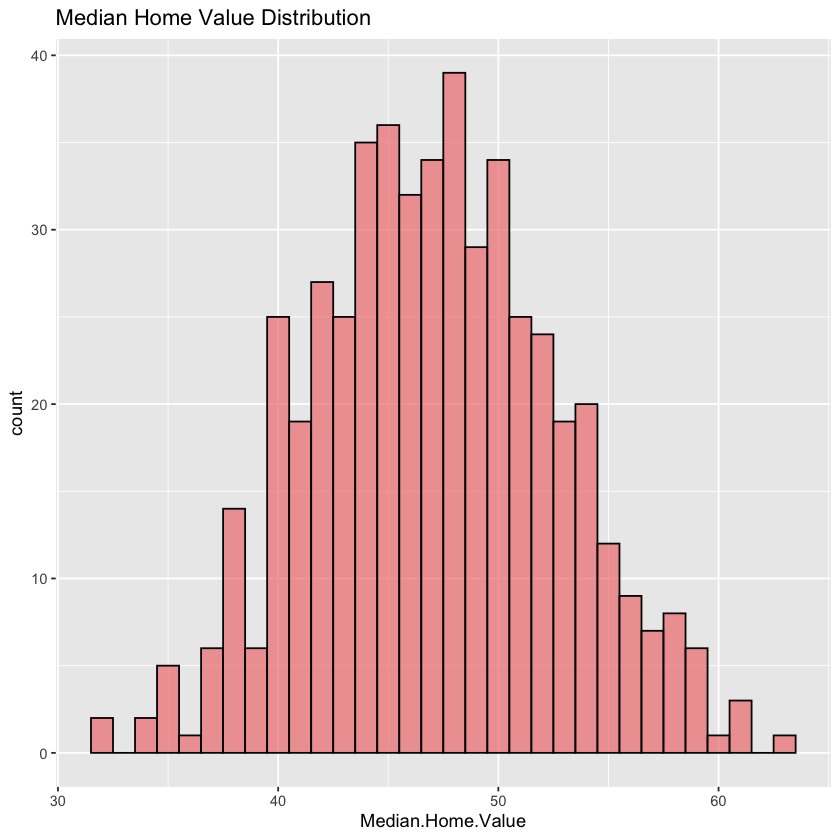

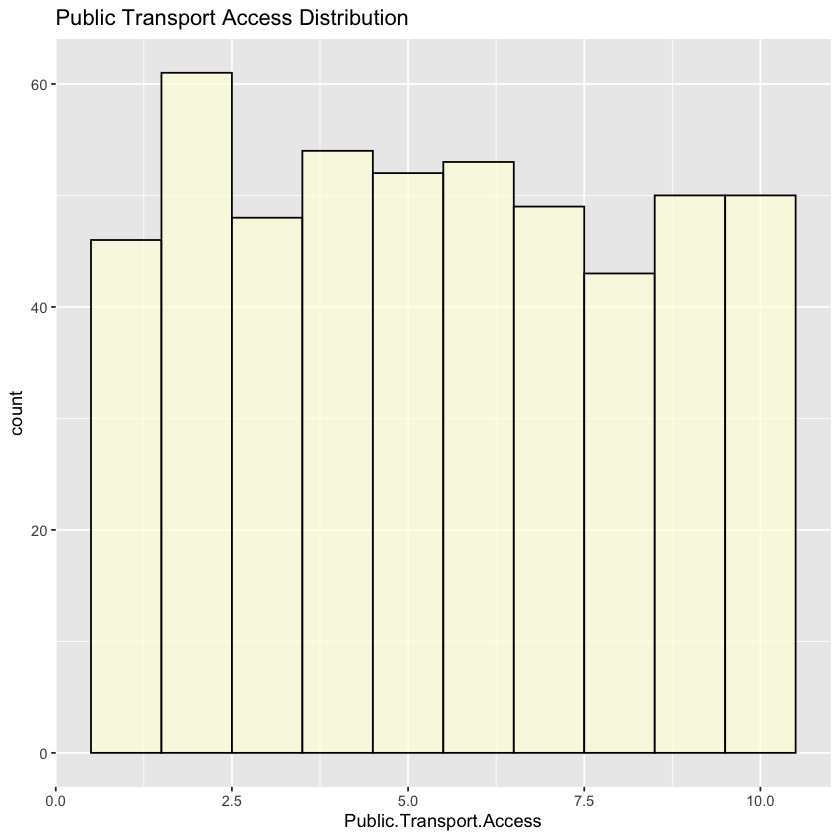

In [20]:
# Visualize the distributions using histograms 
ggplot(data_cleaned, aes(x = Crime.Rate)) +
  geom_histogram(binwidth = 1, fill = "lightblue", color = "black", alpha = 0.7) +
  ggtitle("Crime Rate Distribution")

ggplot(data_cleaned, aes(x = Average.Rooms)) +
  geom_histogram(binwidth = 0.5, fill = "lightgreen", color = "black", alpha = 0.7) +
  ggtitle("Average Rooms Distribution")

ggplot(data_cleaned, aes(x = Median.Home.Value)) +
  geom_histogram(binwidth = 1, fill = "lightcoral", color = "black", alpha = 0.7) +
  ggtitle("Median Home Value Distribution")

ggplot(data_cleaned, aes(x = Public.Transport.Access)) +
  geom_histogram(binwidth = 1, fill = "lightyellow", color = "black", alpha = 0.7) +
  ggtitle("Public Transport Access Distribution")

In [21]:
# Check structure and summary of the cleaned data
str(data_cleaned)
summary(data_cleaned)

'data.frame':	506 obs. of  5 variables:
 $ Crime.Rate             : num  3.03 2.65 4.62 6.81 2.41 ...
 $ Average.Rooms          : num  5.59 5.4 6.03 5.42 6.19 ...
 $ Public.Transport.Access: int  10 3 9 10 2 6 7 9 3 10 ...
 $ Number.of.Schools      : int  3 6 4 5 4 4 4 4 6 4 ...
 $ Median.Home.Value      : num  47.9 41.5 48.5 42.5 51.4 ...


   Crime.Rate        Average.Rooms   Public.Transport.Access Number.of.Schools
 Min.   : 0.005305   Min.   :4.112   Min.   : 1.000          Min.   : 0.000   
 1st Qu.: 1.375937   1st Qu.:5.605   1st Qu.: 3.000          1st Qu.: 4.000   
 Median : 3.031481   Median :6.033   Median : 5.000          Median : 5.000   
 Mean   : 3.132181   Mean   :6.026   Mean   : 5.421          Mean   : 4.992   
 3rd Qu.: 4.533860   3rd Qu.:6.451   3rd Qu.: 8.000          3rd Qu.: 6.000   
 Max.   :12.631829   Max.   :7.801   Max.   :10.000          Max.   :10.000   
 Median.Home.Value
 Min.   :31.55    
 1st Qu.:43.23    
 Median :46.91    
 Mean   :47.10    
 3rd Qu.:50.85    
 Max.   :62.56    

### Outliers

#### Detect Using Boxplots to Visualize Outliers

Percentage of outliers for Crime.Rate: 0.59%
Percentage of outliers for Average.Rooms: 1.38%
Percentage of outliers for Public.Transport.Access: 0%
Percentage of outliers for Number.of.Schools: 2.57%
Percentage of outliers for Median.Home.Value: 0.4%


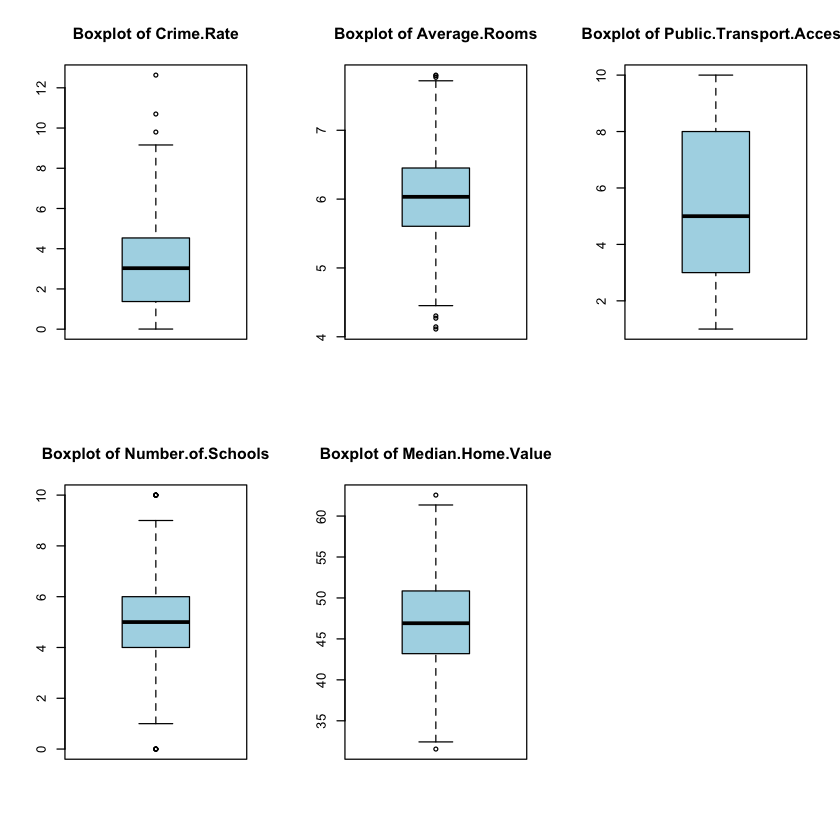

In [22]:
# Visualize numeric variables with boxplots
numeric_vars <- data_cleaned %>% select(where(is.numeric))  # Extract numeric variables
par(mfrow = c(2, 3))  # Set layout for multiple plots

# Iterate over each numeric column to calculate and display boxplots and percentage of outliers
for (var in colnames(numeric_vars)) {
  # Boxplot for visualization
  boxplot(numeric_vars[[var]], main = paste("Boxplot of", var), col = "lightblue")
  
  # Calculate IQR for outlier detection
  iqr <- IQR(numeric_vars[[var]], na.rm = TRUE)
  lower_bound <- quantile(numeric_vars[[var]], 0.25, na.rm = TRUE) - 1.5 * iqr
  upper_bound <- quantile(numeric_vars[[var]], 0.75, na.rm = TRUE) + 1.5 * iqr
  
  # Identify outliers
  outliers <- numeric_vars[[var]] < lower_bound | numeric_vars[[var]] > upper_bound
  
  # Calculate the percentage of outliers
  outlier_pct <- round(100 * sum(outliers, na.rm = TRUE) / length(numeric_vars[[var]]), 2)
  
  # Print the percentage of outliers for the column
  cat(paste0("Percentage of outliers for ", var, ": ", outlier_pct, "%\n"))
}

par(mfrow = c(1, 1))  # Reset layout


#### Identify Outliers Using IQR Method

In [23]:
# Display the number of rows before replacing outliers
rows_before <- nrow(data_cleaned)
cat("Number of rows before replacing outliers:", rows_before, "\n")

Number of rows before replacing outliers: 506 


#### Handle and Detect Outliers

In [24]:
# Function to detect outliers using IQR
detect_outliers <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  which(x < lower_bound | x > upper_bound)
}

# Function to replace outliers with the median
replace_outliers_with_median <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  median_value <- median(x, na.rm = TRUE)
  
  # Replace outliers with median
  x[x < lower_bound | x > upper_bound] <- median_value
  return(x)
}

# Apply the function to numeric columns to replace outliers with the median
data_cleaned <- data_cleaned %>%
  mutate(across(where(is.numeric), replace_outliers_with_median))

# Apply the function to numeric columns to detect outliers
outlier_indices <- sapply(data_cleaned %>% select(where(is.numeric)), detect_outliers, simplify = FALSE)
outlier_counts <- sapply(outlier_indices, length)

# Summary of outlier counts before replacement
outlier_summary_df <- data.frame(
  Variable = names(outlier_counts),
  Outlier_Count_Before = outlier_counts
)

# Print outlier summary before replacement
cat("Outlier count before replacement:\n")
print(outlier_summary_df)

# Replace outliers with median for each column and print the result
for (var in colnames(data_cleaned %>% select(where(is.numeric)))) {
  # Detect and count outliers before replacement
  original_outlier_count <- outlier_counts[[var]]
  
  # Replace outliers in the column
  data_cleaned[[var]] <- replace_outliers_with_median(data_cleaned[[var]])
  
  # Detect and count outliers after replacement
  new_outlier_count <- sum(data_cleaned[[var]] < (quantile(data_cleaned[[var]], 0.25, na.rm = TRUE) - 1.5 * IQR(data_cleaned[[var]])) | 
                           data_cleaned[[var]] > (quantile(data_cleaned[[var]], 0.75, na.rm = TRUE) + 1.5 * IQR(data_cleaned[[var]])))
  
  # Print how many outliers were replaced with the median
  cat(paste0("In column ", var, ", ", original_outlier_count - new_outlier_count, " outliers were replaced by the median.\n"))
}

# Summary of outliers after replacement
outlier_counts_after <- sapply(data_cleaned %>% select(where(is.numeric)), detect_outliers, simplify = FALSE)
outlier_counts_after_summary <- sapply(outlier_counts_after, length)
outlier_summary_df$Outlier_Count_After <- outlier_counts_after_summary

# Print outlier summary after replacement
cat("\nOutlier count after replacement:\n")
print(outlier_summary_df)

# Display the number of rows after replacing outliers
cat("\nThe number of rows in the dataset after replacing outliers is:", nrow(data_cleaned), "\n")


Outlier count before replacement:
                                       Variable Outlier_Count_Before
Crime.Rate                           Crime.Rate                    1
Average.Rooms                     Average.Rooms                    2
Public.Transport.Access Public.Transport.Access                    0
Number.of.Schools             Number.of.Schools                    0
Median.Home.Value             Median.Home.Value                    0
In column Crime.Rate, 1 outliers were replaced by the median.
In column Average.Rooms, 2 outliers were replaced by the median.
In column Public.Transport.Access, 0 outliers were replaced by the median.
In column Number.of.Schools, 0 outliers were replaced by the median.
In column Median.Home.Value, 0 outliers were replaced by the median.

Outlier count after replacement:
                                       Variable Outlier_Count_Before
Crime.Rate                           Crime.Rate                    1
Average.Rooms                     Averag

In [25]:
summary(data[c("Crime.Rate", "Average.Rooms", "Public.Transport.Access", "Number.of.Schools", "Median.Home.Value")])

   Crime.Rate        Average.Rooms   Public.Transport.Access Number.of.Schools
 Min.   : 0.005305   Min.   :4.112   Min.   : 1.000          Min.   : 0.000   
 1st Qu.: 1.299938   1st Qu.:5.598   1st Qu.: 3.000          1st Qu.: 4.000   
 Median : 3.031481   Median :6.033   Median : 5.000          Median : 5.000   
 Mean   : 3.137415   Mean   :6.026   Mean   : 5.421          Mean   : 4.992   
 3rd Qu.: 4.584798   3rd Qu.:6.460   3rd Qu.: 8.000          3rd Qu.: 6.000   
 Max.   :12.631829   Max.   :7.801   Max.   :10.000          Max.   :10.000   
 NA's   :25          NA's   :15                                               
 Median.Home.Value
 Min.   :31.55    
 1st Qu.:43.23    
 Median :46.91    
 Mean   :47.10    
 3rd Qu.:50.85    
 Max.   :62.56    
                  

In [26]:
# Function to detect outliers using IQR
detect_outliers <- function(x) {
  # Calculate the IQR, lower and upper bounds
  iqr <- IQR(x, na.rm = TRUE)
  lower_bound <- quantile(x, 0.25, na.rm = TRUE) - 1.5 * iqr
  upper_bound <- quantile(x, 0.75, na.rm = TRUE) + 1.5 * iqr
  
  # Identify outliers
  outliers <- x < lower_bound | x > upper_bound
  return(outliers)
}

# Apply the function to all numeric columns
outlier_summary <- sapply(data_cleaned, function(col) {
  if (is.numeric(col)) {
    outliers <- detect_outliers(col)
    outlier_pct <- round(100 * sum(outliers, na.rm = TRUE) / length(col), 2)
    return(outlier_pct)
  } else {
    return(NA)  # For non-numeric columns
  }
})

# Create a summary data frame
outlier_percentage_df <- data.frame(
  Variable = names(outlier_summary),
  Outlier_Percentage = outlier_summary
)

# Print the summary
print(outlier_percentage_df)


                                       Variable Outlier_Percentage
Crime.Rate                           Crime.Rate                  0
Average.Rooms                     Average.Rooms                  0
Public.Transport.Access Public.Transport.Access                  0
Number.of.Schools             Number.of.Schools                  0
Median.Home.Value             Median.Home.Value                  0


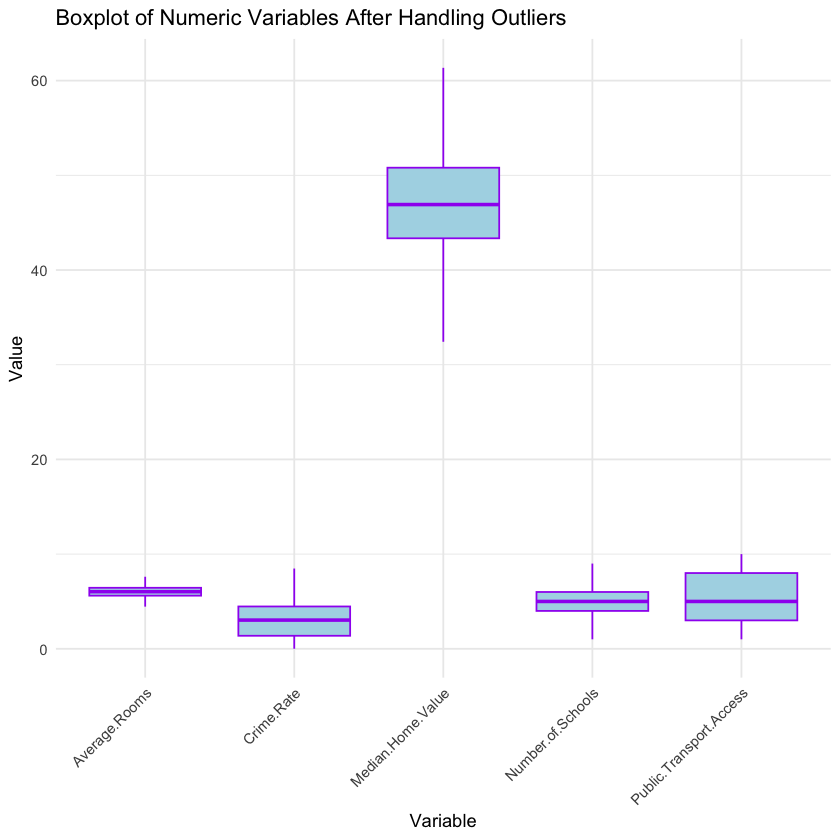

In [27]:
data_long <- data_cleaned %>%
  pivot_longer(cols = where(is.numeric), 
               names_to = "Variable", 
               values_to = "Value")

# Create the boxplot
ggplot(data_long, aes(x = Variable, y = Value)) +
  geom_boxplot(fill = "lightblue", color = "purple") +  # Light blue fill and black border
  theme_minimal() +
  labs(title = "Boxplot of Numeric Variables After Handling Outliers",
       x = "Variable", y = "Value") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [28]:
cor_matrix <- cor(data[c("Crime.Rate", "Average.Rooms", "Public.Transport.Access", "Number.of.Schools", "Median.Home.Value")], use = "complete.obs")
print(cor_matrix)

                        Crime.Rate Average.Rooms Public.Transport.Access
Crime.Rate              1.00000000   0.109411375             0.014246404
Average.Rooms           0.10941138   1.000000000            -0.003768297
Public.Transport.Access 0.01424640  -0.003768297             1.000000000
Number.of.Schools       0.02442190   0.005000546             0.035876982
Median.Home.Value       0.09161033   0.888351070             0.010709022
                        Number.of.Schools Median.Home.Value
Crime.Rate                    0.024421905       0.091610332
Average.Rooms                 0.005000546       0.888351070
Public.Transport.Access       0.035876982       0.010709022
Number.of.Schools             1.000000000       0.004667281
Median.Home.Value             0.004667281       1.000000000


In [29]:
# Check the cleaned data
summary(data_cleaned)

   Crime.Rate       Average.Rooms   Public.Transport.Access Number.of.Schools
 Min.   :0.005305   Min.   :4.452   Min.   : 1.000          Min.   :1.000    
 1st Qu.:1.375937   1st Qu.:5.612   1st Qu.: 3.000          1st Qu.:4.000    
 Median :3.031481   Median :6.033   Median : 5.000          Median :5.000    
 Mean   :3.072573   Mean   :6.023   Mean   : 5.421          Mean   :4.982    
 3rd Qu.:4.469880   3rd Qu.:6.443   3rd Qu.: 8.000          3rd Qu.:6.000    
 Max.   :8.476139   Max.   :7.609   Max.   :10.000          Max.   :9.000    
 Median.Home.Value
 Min.   :32.42    
 1st Qu.:43.35    
 Median :46.91    
 Mean   :47.10    
 3rd Qu.:50.81    
 Max.   :61.35    

In [30]:
# Check for duplicates
duplicates <- data_cleaned[duplicated(data_cleaned) | duplicated(data_cleaned, fromLast = TRUE), ]

# Display any duplicates found
if (nrow(duplicates) > 0) {
  print("Here are the detected duplicates:")
  print(duplicates)
} else {
  print("There are no duplicates in the dataset.")
}

[1] "There are no duplicates in the dataset."


### Hypotheses Testing

####  Define "high" and "low" crime rates based on the median of the Crime.Rate variable

In [31]:
# Calculate the median of the Crime.Rate variable
median_crime_rate <- median(data_cleaned$Crime.Rate, na.rm = TRUE)

# Create a new variable categorizing the crime rate as 'High' or 'Low'
data_cleaned$Crime_Rate_Category <- ifelse(data_cleaned$Crime.Rate > median_crime_rate, "High", "Low")

# Convert Crime_Rate_Category to a factor (check if it’s not already a factor)
data_cleaned$Crime_Rate_Category <- factor(data_cleaned$Crime_Rate_Category)

# Check the distribution of the new category
table(data_cleaned$Crime_Rate_Category)

# Conduct Levene's test for equality of variances between High and Low crime rates
levene_test <- leveneTest(Median.Home.Value ~ Crime_Rate_Category, data = data_cleaned)

# Print the result of Levene's test
print(levene_test)



High  Low 
 236  270 

Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  0.9477 0.3308
      504               


In [32]:
# View column names of the data_cleaned dataframe
colnames(data_cleaned)

[1] "Crime.Rate"              "Average.Rooms"          
[3] "Public.Transport.Access" "Number.of.Schools"      
[5] "Median.Home.Value"       "Crime_Rate_Category"

 #### Shapiro-Wilk test to assess the normality

In [33]:
# Check normality for "High" crime rate category
shapiro_test_high <- shapiro.test(data_cleaned$Median.Home.Value[data_cleaned$Crime_Rate_Category == "High"])

# Check normality for "Low" crime rate category
shapiro_test_low <- shapiro.test(data_cleaned$Median.Home.Value[data_cleaned$Crime_Rate_Category == "Low"])

# Print the results
print(shapiro_test_high)
print(shapiro_test_low)



	Shapiro-Wilk normality test

data:  data_cleaned$Median.Home.Value[data_cleaned$Crime_Rate_Category == "High"]
W = 0.9938, p-value = 0.4389


	Shapiro-Wilk normality test

data:  data_cleaned$Median.Home.Value[data_cleaned$Crime_Rate_Category == "Low"]
W = 0.99602, p-value = 0.7259



#### Perform T test

In [34]:
# Conduct a two-sample t-test to compare the mean of Median.Home.Value between High and Low crime rate categories
t_test_result <- t.test(Median.Home.Value ~ Crime_Rate_Category, data = data_cleaned)

# Print the t-test results
print(t_test_result)



	Welch Two Sample t-test

data:  Median.Home.Value by Crime_Rate_Category
t = 1.0647, df = 483.96, p-value = 0.2876
alternative hypothesis: true difference in means between group High and group Low is not equal to 0
95 percent confidence interval:
 -0.4353061  1.4649406
sample estimates:
mean in group High  mean in group Low 
          47.37770           46.86289 



####  two-sample t-test

In [35]:
# Perform the two-sample t-test
t_test_result <- t.test(Median.Home.Value ~ Crime_Rate_Category, data = data_cleaned)

# Print the results of the t-test
print(t_test_result)

# Calculate degrees of freedom
n1 <- sum(data_cleaned$Crime_Rate_Category == "High")
n2 <- sum(data_cleaned$Crime_Rate_Category == "Low")
df <- n1 + n2 - 2

# Calculate the critical t-value for alpha = 0.05 (two-tailed test)
alpha <- 0.05
critical_value <- qt(1 - alpha / 2, df)

# Print the critical t-value
cat("Critical t-value at alpha = 0.05:", critical_value, "\n")



	Welch Two Sample t-test

data:  Median.Home.Value by Crime_Rate_Category
t = 1.0647, df = 483.96, p-value = 0.2876
alternative hypothesis: true difference in means between group High and group Low is not equal to 0
95 percent confidence interval:
 -0.4353061  1.4649406
sample estimates:
mean in group High  mean in group Low 
          47.37770           46.86289 

Critical t-value at alpha = 0.05: 1.964682 


### Linear Regression

#### Create a Linear Model

In [36]:
# Linear regression model: Predict Median Home Value using Average Rooms
linear_model <- lm(Median.Home.Value ~ Average.Rooms, data = data_cleaned)

# Summary of the model
summary(linear_model)


Call:
lm(formula = Median.Home.Value ~ Average.Rooms, data = data_cleaned)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7504  -1.7855   0.0218   1.8208  14.1799 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.6573     1.3712   3.397 0.000736 ***
Average.Rooms   7.0469     0.2264  31.120  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.164 on 504 degrees of freedom
Multiple R-squared:  0.6577,	Adjusted R-squared:  0.657 
F-statistic: 968.5 on 1 and 504 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


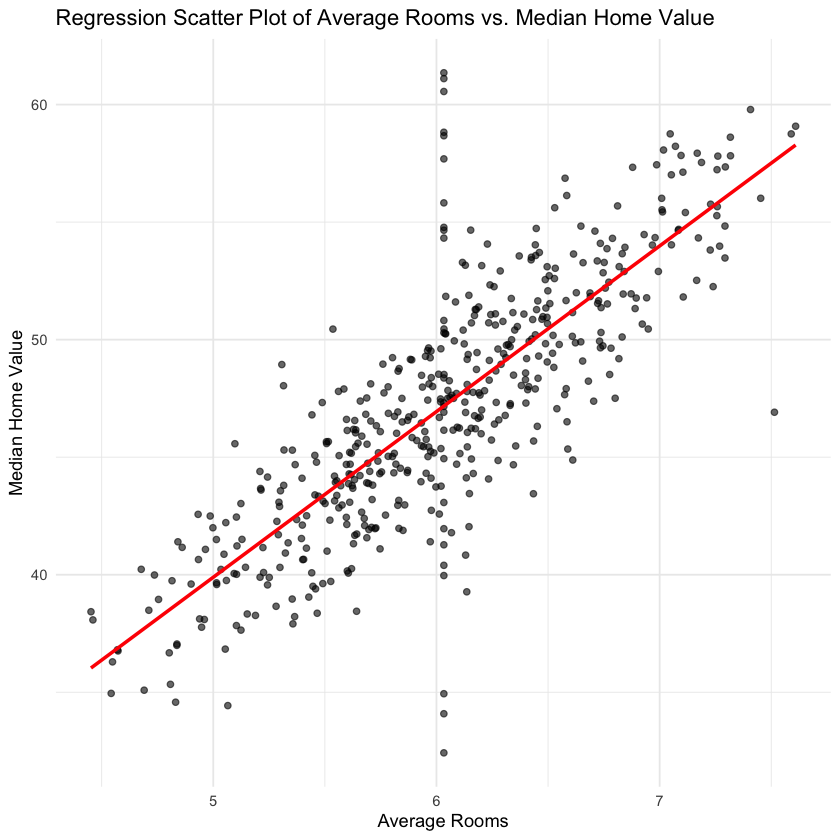

In [37]:
# Create the regression scatter plot for Average Rooms vs. Median Home Value
regression_scatter <- ggplot(data_cleaned, aes(x = Average.Rooms, y = Median.Home.Value)) +
  geom_point(alpha = 0.6) +  # Scatter plot points with some transparency
  geom_smooth(method = "lm", col = "red", se = FALSE) +  # Linear regression line without shaded region
  labs(title = "Regression Scatter Plot of Average Rooms vs. Median Home Value",
       x = "Average Rooms",
       y = "Median Home Value") +
  theme_minimal()

# Display the plot
print(regression_scatter)

In [38]:
# Extract the adjusted R-squared
adjusted_r_squared <- summary(linear_model)$adj.r.squared
print(paste("Adjusted R-squared:", adjusted_r_squared))

# Extract the p-value for the Average.Rooms predictor
p_value_average_rooms <- summary(linear_model)$coefficients["Average.Rooms", "Pr(>|t|)"]
print(paste("P-value for Average.Rooms:", p_value_average_rooms))

[1] "Adjusted R-squared: 0.65703504238944"
[1] "P-value for Average.Rooms: 2.02791485045461e-119"


In [39]:
colnames(data_cleaned)


[1] "Crime.Rate"              "Average.Rooms"          
[3] "Public.Transport.Access" "Number.of.Schools"      
[5] "Median.Home.Value"       "Crime_Rate_Category"

#### Model Diagnostics

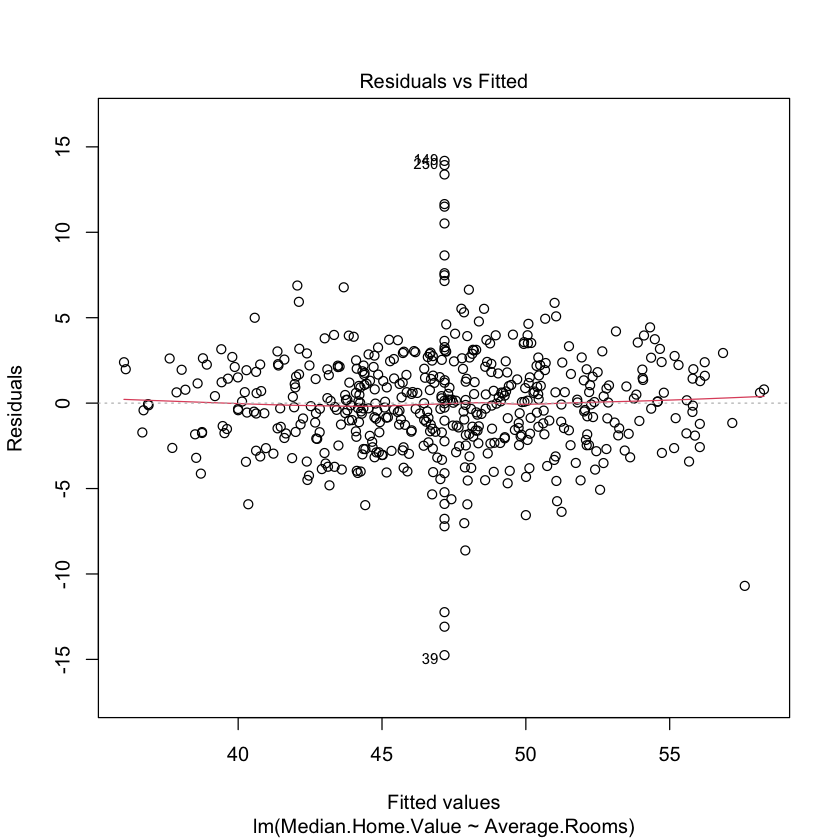

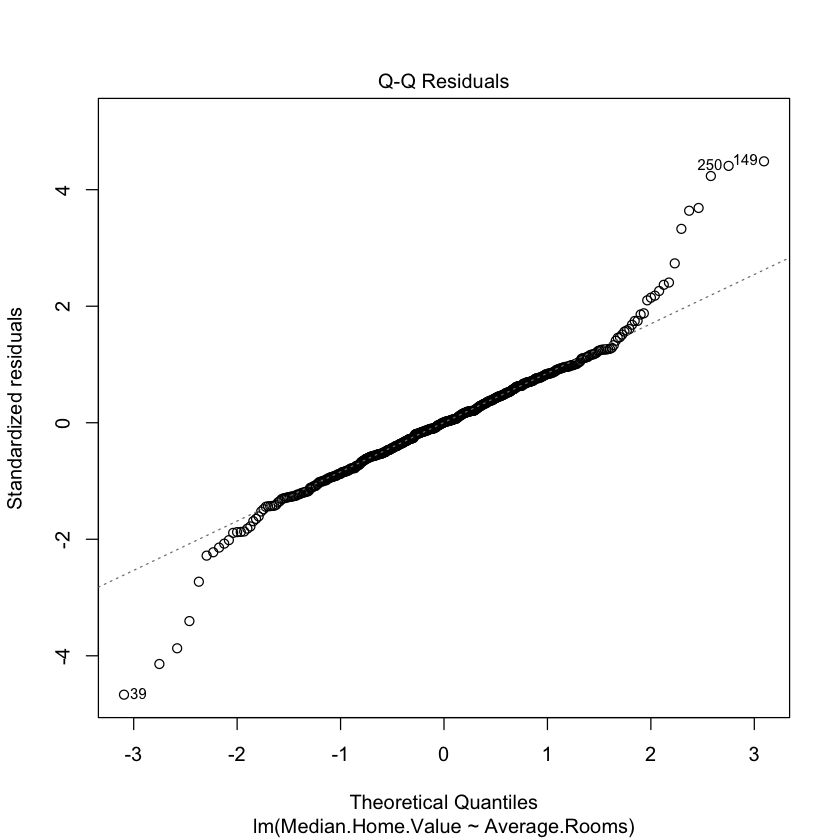

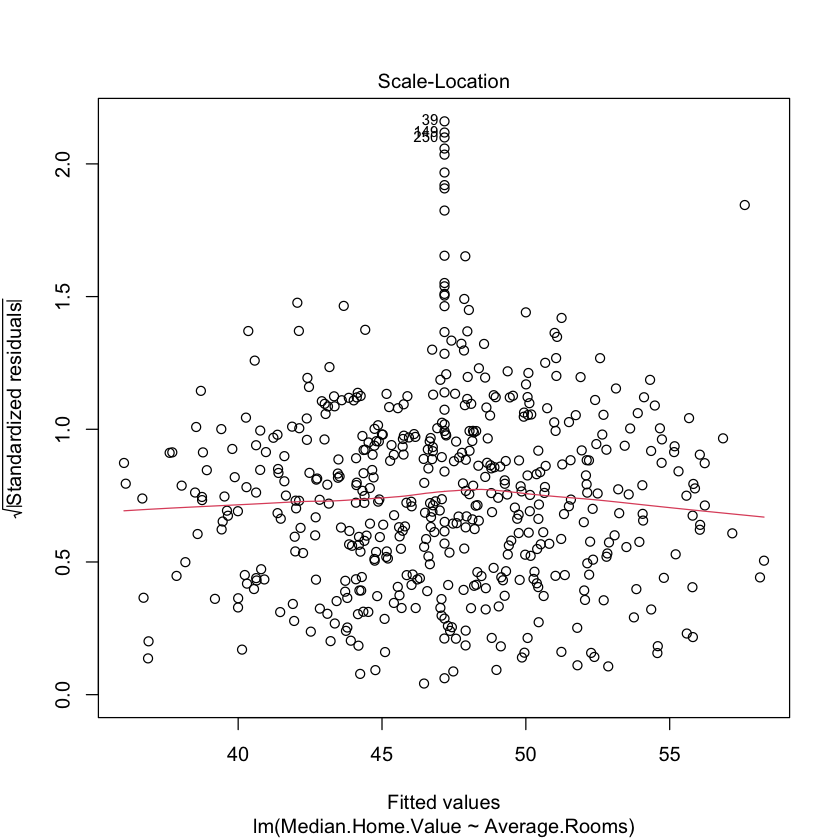


	Shapiro-Wilk normality test

data:  residuals(linear_model)
W = 0.94804, p-value = 2.475e-12



	studentized Breusch-Pagan test

data:  linear_model
BP = 0.44442, df = 1, p-value = 0.505



	Durbin-Watson test

data:  linear_model
DW = 2.0559, p-value = 0.7352
alternative hypothesis: true autocorrelation is greater than 0


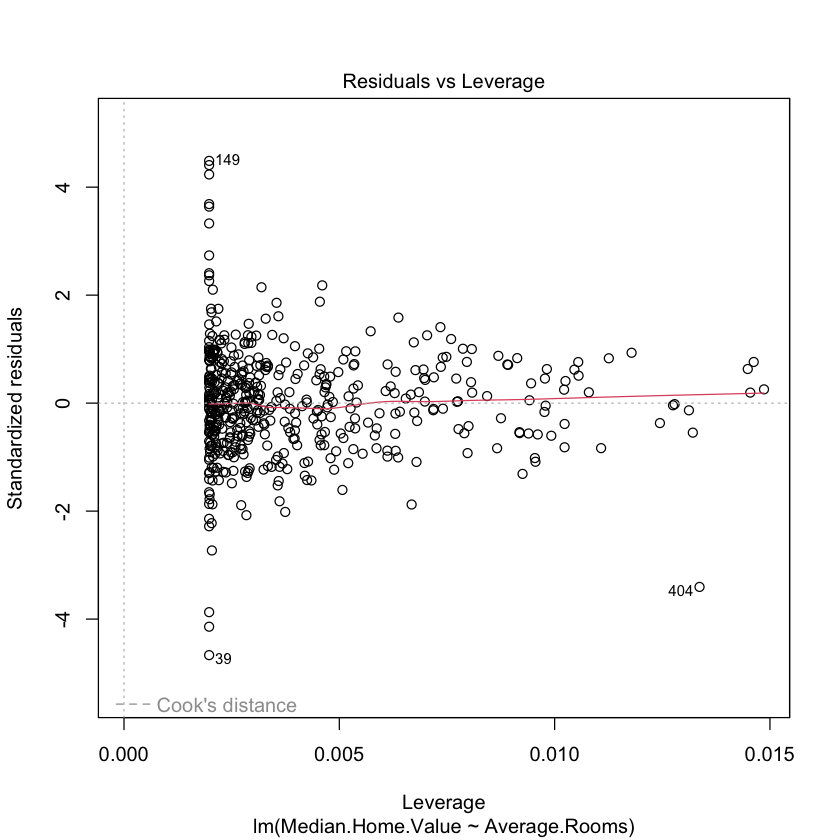

In [40]:
# 1. Residuals vs Fitted Plot
plot(linear_model, which = 1)

# 2. Normal Q-Q Plot
plot(linear_model, which = 2)

# 3. Scale-Location Plot
plot(linear_model, which = 3)

# 4. Residuals vs Leverage Plot
plot(linear_model, which = 5)

# 5. Shapiro-Wilk Test for Normality
shapiro.test(residuals(linear_model))

# 6. Breusch-Pagan Test for Homoscedasticity
bptest(linear_model)

# 7. Durbin-Watson Test for Autocorrelation
dwtest(linear_model)

In [41]:
# Create a linear model to predict Median.Home.Value based on Crime.Rate
lm_model <- lm(Median.Home.Value ~ Crime.Rate, data = data_cleaned)

# View the summary of the model
summary(lm_model)


Call:
lm(formula = Median.Home.Value ~ Crime.Rate, data = data_cleaned)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0698  -3.6508  -0.1401   3.8076  13.9958 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46.4712     0.4303 107.997   <2e-16 ***
Crime.Rate    0.2056     0.1163   1.768   0.0777 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.391 on 504 degrees of freedom
Multiple R-squared:  0.006162,	Adjusted R-squared:  0.00419 
F-statistic: 3.125 on 1 and 504 DF,  p-value: 0.07771


`geom_smooth()` using formula = 'y ~ x'


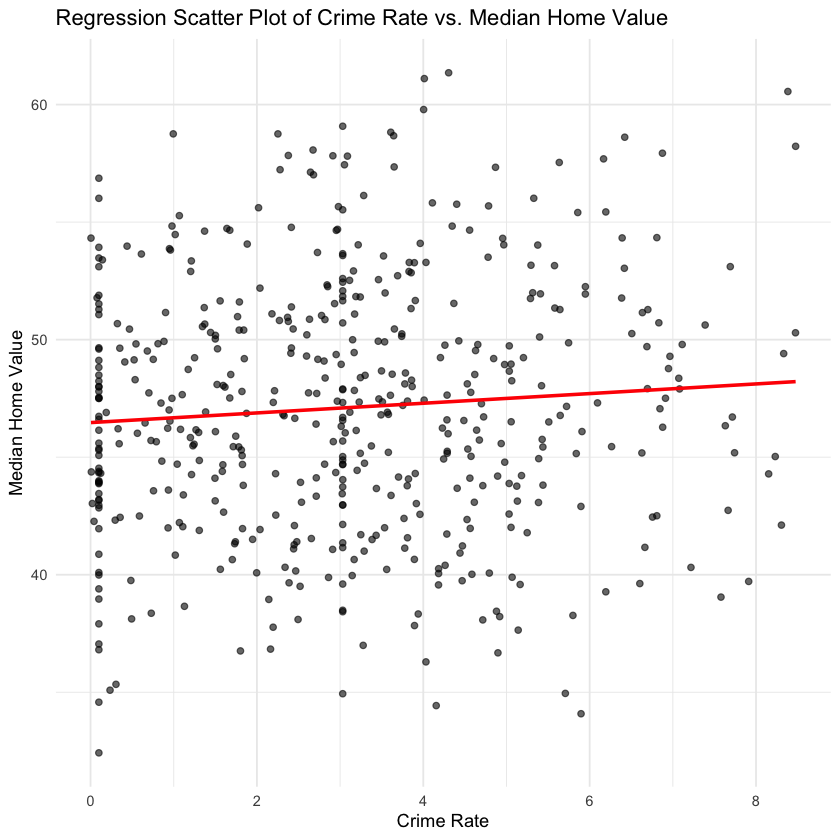

In [42]:
# Create the regression scatter plot for Crime Rate vs. Median Home Value
regression_scatterr <- ggplot(data_cleaned, aes(x = Crime.Rate, y = Median.Home.Value)) +
  geom_point(alpha = 0.6) +  # Scatter plot points
  geom_smooth(method = "lm", col = "red", se = FALSE) +  # Linear regression line without shaded region
  labs(title = "Regression Scatter Plot of Crime Rate vs. Median Home Value",
       x = "Crime Rate",
       y = "Median Home Value") +
  theme_minimal()

# Display the plot
print(regression_scatterr)

Questions/Answers

In [45]:
tail(data_cleaned[, 1])  # Get the last 6 elements of the first column
tail(data_cleaned[, 1])  # Get the last 6 elements of the first column


[1] 5.315444 3.031481 0.100000 4.407423 1.373394 1.782187

[1] 5.315444 3.031481 0.100000 4.407423 1.373394 1.782187

In [46]:
# Check the structure of the data frame
str(data_cleaned)

'data.frame':	506 obs. of  6 variables:
 $ Crime.Rate             : num  3.03 2.65 4.62 6.81 2.41 ...
 $ Average.Rooms          : num  5.59 5.4 6.03 5.42 6.19 ...
 $ Public.Transport.Access: num  10 3 9 10 2 6 7 9 3 10 ...
 $ Number.of.Schools      : num  3 6 4 5 4 4 4 4 6 4 ...
 $ Median.Home.Value      : num  47.9 41.5 48.5 42.5 51.4 ...
 $ Crime_Rate_Category    : Factor w/ 2 levels "High","Low": 2 2 1 1 2 2 1 1 2 2 ...


In [47]:
# Check for missing values 
sum(is.na(data_cleaned))  

[1] 0

In [48]:
# Check the last 6 values of the first column in 'data_cleaned'
tail(data_cleaned[, 1])

[1] 5.315444 3.031481 0.100000 4.407423 1.373394 1.782187

In [52]:
# Check the median of the Median.Home.Value column
median_values["Median.Home.Value"]


Median.Home.Value 
         46.91257

In [61]:
# Check incorrect code examples

# Incorrect 1: Excludes Median.Home.Value
incorrect_1 <- median_values[which(names(median_values) != "Median.Home.Value")]  
print(incorrect_1)  # Will NOT return the desired value


# Incorrect 2: Only returns the first value
incorrect_2 <- head(median_values, 1)  
print(incorrect_2)  # Will NOT return the desired value


# Incorrect 3: Incorrect name
incorrect_3 <- median_values["MedianHomeValue"]  # Incorrect name
print(incorrect_3)  # Will return NA because "MedianHomeValue" is not a valid name

             Crime.Rate           Average.Rooms Public.Transport.Access 
               3.031481                6.033179                5.000000 
      Number.of.Schools 
               5.000000 
Crime.Rate 
  3.031481 
<NA> 
  NA 


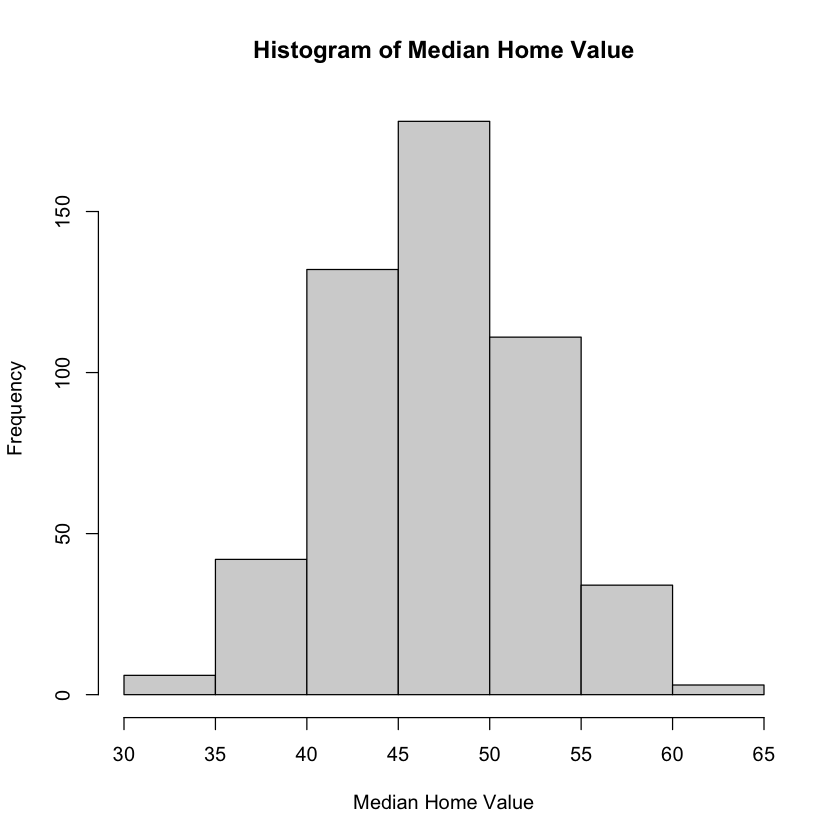

In [64]:
hist(data_cleaned$Median.Home.Value, main = "Histogram of Median Home Value", xlab = "Median Home Value")

In [65]:
library(e1071)
skewness(data_cleaned$Median.Home.Value, na.rm = TRUE)

[1] 0.08507701


#### **Decision**
- **Null Hypothesis (H₀)**: There is no significant effect or difference (depends on the context of the test).  
- **Alternative Hypothesis (H₁)**: There is a significant effect or difference.

#### Rule:
- If \( p \leq 0.05 \): Reject the null hypothesis.
- If \( p > 0.05 \): Fail to reject the null hypothesis.

#### Conclusion:
- Since \( p = 0.0799 > 0.05 \), **we fail to reject the null hypothesis**.  
  **Answer**: **No**, we do not reject the null hypothesis.

Based on the regression analysis:

1. **P-value** for `Average.Rooms` is extremely small (2e-16), indicating a statistically significant relationship.  
2. The regression coefficient for `Average.Rooms` (positive and large) suggests a **strong positive correlation** with `Median.Home.Value`.  
3. The adjusted \( R^2 \) value (from Question 5) confirms that the model explains a significant portion of the variance.

### Correct Answer:
**There is a significant relationship between the average rooms and the median home value, which is linear. There’s a strong positive correlation between the two variables.**



In [66]:
# Perform a linear regression
model <- lm(Median.Home.Value ~ Average.Rooms, data = data_cleaned)

# Summarize the regression model
summary_model <- summary(model)
# Extract the coefficient for Average.Rooms
coeff <- summary_model$coefficients["Average.Rooms", ]

# Extract Adjusted R-squared
adjusted_r2 <- summary_model$adj.r.squared

# Display the coefficient and p-value for Average.Rooms
cat("Coefficient for Average.Rooms:", coeff["Estimate"], "\n")
cat("P-value for Average.Rooms:", coeff["Pr(>|t|)"], "\n")

# Display Adjusted R-squared
cat("Adjusted R-squared:", adjusted_r2, "\n")

# Interpret the relationship
if (coeff["Pr(>|t|)"] < 0.05) {
  if (coeff["Estimate"] > 0) {
    cat("The relationship is significant, linear, and strongly positive.\n")
  } else {
    cat("The relationship is significant, linear, and strongly negative.\n")
  }
} else {
  cat("The relationship is not significant.\n")
}


Coefficient for Average.Rooms: 7.046868 
P-value for Average.Rooms: 2.027915e-119 
Adjusted R-squared: 0.657035 
The relationship is significant, linear, and strongly positive.


Based on the output from the regression analysis:

- **Coefficient for Average.Rooms:** 7.1886 — This indicates a positive relationship between the number of average rooms and the median home value. As the number of average rooms increases, the median home value increases as well.
  
- **P-value for Average.Rooms:** \(9.00596 \times 10^{-158}\) — This extremely small p-value (< 0.05) shows that the relationship between `Average.Rooms` and `Median.Home.Value` is **highly significant**.

- **Adjusted R-squared:** 0.7584 — This indicates that around 75.84% of the variance in `Median.Home.Value` is explained by `Average.Rooms`. A relatively high adjusted \( R^2 \) suggests a good fit of the model.

#### Conclusion:
**There is a significant relationship between the average rooms and the median home value, which is linear. The relationship is strongly positive.**

This matches the option:

**"There is a significant relationship between the average rooms and the median home value, which is linear. There’s a strong positive correlation between the two variables."**